# PROBLEM STATMENT

For a retail company, customer engagement is crucial for increasing sales and profitability over time. Customer churn can lead to lost revenue, profits, and additional costs. Thus, understanding why customers churn and how to retain them is essential for customer relationship management. By analyzing historical customer data, including their characteristics, transactions, and interactions, retail companies can predict customer retention potential. This can help them develop targeted marketing programs and identify opportunities for retaining customers at risk of churning. In this project, the goal is to classify customers as having high, medium, or low retention potential, with a focus on the medium category as an opportunity for targeted retention efforts.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# LOADING THE DATA

In [3]:
# loading the customerdata 
df_customer = pd.read_excel('/content/drive/MyDrive/Train data Capstone/Customerdata_Train.xlsx')

In [4]:
df_customer

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday
...,...,...,...,...,...,...,...
23815,C23511,CITY2,2018-01-17,1,1,0,Friday
23816,C12197,CITY3,2018-01-17,1,0,1,Friday
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday


In [5]:
df_customer.shape

(23820, 7)

In [6]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            23820 non-null  object        
 1   City                  23820 non-null  object        
 2   DateOfRegistration    23820 non-null  datetime64[ns]
 3   OnlineCommunication   23820 non-null  int64         
 4   AutomaticRefill       23820 non-null  int64         
 5   DoorstepDelivery      23820 non-null  int64         
 6   PreferredDeliveryDay  23820 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.3+ MB


In [7]:
df_customer.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [8]:
df_customer.nunique()

CustomerID              23820
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
dtype: int64

In [9]:
df_customer.duplicated().sum()

0

In [10]:
# loading the email data
df_email = pd.read_excel('/content/drive/MyDrive/Train data Capstone/Emaildata_Train.xlsx')

In [11]:
df_email

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable
...,...,...,...,...,...,...
517667,C36140,2018-01-18,CustomizedEmail,14:04:44,yes,yes
517668,C36140,2018-01-21,CustomizedEmail,16:17:16,no,no
517669,C36140,2018-01-20,CustomizedEmail,12:17:34,yes,yes
517670,C36140,2018-01-20,CustomizedEmail,16:31:18,yes,no


In [12]:
df_email.shape


(517672, 6)

In [13]:
df_email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517672 entries, 0 to 517671
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CustomerID   517672 non-null  object
 1   DateOfemail  517672 non-null  object
 2   EmailType    517672 non-null  object
 3   timestamp    517672 non-null  object
 4   MailOpened   517672 non-null  object
 5   MailClicked  517672 non-null  object
dtypes: object(6)
memory usage: 23.7+ MB


In [14]:
df_email.isnull().sum()

CustomerID     0
DateOfemail    0
EmailType      0
timestamp      0
MailOpened     0
MailClicked    0
dtype: int64

In [15]:
df_email.duplicated().sum()

0

In [16]:
df_email.nunique()

CustomerID     23820
DateOfemail     3382
EmailType          2
timestamp      14369
MailOpened         2
MailClicked        3
dtype: int64

In [17]:
# loading the train data
df_train = pd.read_excel('/content/drive/MyDrive/Train data Capstone/Train.xlsx')

In [18]:
df_train

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High
...,...,...
23815,C14975,Low
23816,C30392,Low
23817,C41735,Low
23818,C26055,Low


In [19]:
df_train.shape

(23820, 2)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          23820 non-null  object
 1   RetentionPotential  23820 non-null  object
dtypes: object(2)
memory usage: 372.3+ KB


In [21]:
df_train.isnull().sum()

CustomerID            0
RetentionPotential    0
dtype: int64

In [22]:
df_train.nunique()

CustomerID            23820
RetentionPotential        3
dtype: int64

In [23]:
df_train.duplicated().sum()

0

In [24]:
# loading the transaction data
df_transaction = pd.read_excel('/content/drive/MyDrive/Train data Capstone/transactionsdata_Train.xlsx')

In [25]:
df_transaction

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81
...,...,...,...,...
104750,C12197,2018-01-17,14:35:40,56
104751,C40967,2018-01-17,17:15:20,35
104752,C36140,2018-01-17,13:12:54,47
104753,C36140,2018-01-21,21:12:52,53


In [26]:
df_transaction.shape

(104755, 4)

In [27]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104755 entries, 0 to 104754
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CustomerID     104755 non-null  object
 1   DateOfOrder    104755 non-null  object
 2   timestamp      104755 non-null  object
 3   OrderQuantity  104755 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.2+ MB


In [28]:
df_transaction.isnull().sum()

CustomerID       0
DateOfOrder      0
timestamp        0
OrderQuantity    0
dtype: int64

In [29]:
df_transaction.nunique()

CustomerID       23820
DateOfOrder       3151
timestamp        21399
OrderQuantity      451
dtype: int64

In [30]:
df_transaction.duplicated().sum()

0

# MERGING THE DATA

In [31]:

merged_df = pd.merge(df_customer, df_email, on='CustomerID', how='outer')
merged_df = pd.merge(merged_df, df_train, on='CustomerID', how='outer')
merged_df = pd.merge(merged_df, df_transaction, on='CustomerID', how='outer')


In [32]:
merged_df

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,timestamp_x,MailOpened,MailClicked,RetentionPotential,DateOfOrder,timestamp_y,OrderQuantity
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,High,2013-08-11,15:17:52,15
1,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-20,CustomizedEmail,15:10:30,yes,no,High,2013-08-11,15:17:52,15
2,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-02-05,CustomizedEmail,13:54:22,yes,no,High,2013-08-11,15:17:52,15
3,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-11-26,CustomizedEmail,11:22:32,yes,no,High,2013-08-11,15:17:52,15
4,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-30,CustomizedEmail,14:04:42,yes,no,High,2013-08-11,15:17:52,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883464,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,16:31:18,yes,no,Low,2018-01-17,13:12:54,47
3883465,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,16:31:18,yes,no,Low,2018-01-21,21:12:52,53
3883466,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,14:23:16,yes,yes,Low,2018-01-17,13:12:54,47
3883467,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,14:23:16,yes,yes,Low,2018-01-21,21:12:52,53


In [33]:
merged_df.shape

(3883469, 16)

In [34]:
merged_df.nunique()

CustomerID              23820
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
DateOfemail              3382
EmailType                   2
timestamp_x             14369
MailOpened                  2
MailClicked                 3
RetentionPotential          3
DateOfOrder              3151
timestamp_y             21399
OrderQuantity             451
dtype: int64

In [35]:
merged_df

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,timestamp_x,MailOpened,MailClicked,RetentionPotential,DateOfOrder,timestamp_y,OrderQuantity
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,High,2013-08-11,15:17:52,15
1,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-20,CustomizedEmail,15:10:30,yes,no,High,2013-08-11,15:17:52,15
2,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-02-05,CustomizedEmail,13:54:22,yes,no,High,2013-08-11,15:17:52,15
3,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-11-26,CustomizedEmail,11:22:32,yes,no,High,2013-08-11,15:17:52,15
4,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-30,CustomizedEmail,14:04:42,yes,no,High,2013-08-11,15:17:52,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883464,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,16:31:18,yes,no,Low,2018-01-17,13:12:54,47
3883465,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,16:31:18,yes,no,Low,2018-01-21,21:12:52,53
3883466,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,14:23:16,yes,yes,Low,2018-01-17,13:12:54,47
3883467,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,14:23:16,yes,yes,Low,2018-01-21,21:12:52,53


In [36]:
merged_df.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
DateOfemail             0
EmailType               0
timestamp_x             0
MailOpened              0
MailClicked             0
RetentionPotential      0
DateOfOrder             0
timestamp_y             0
OrderQuantity           0
dtype: int64

In [37]:
merged_df.duplicated().sum()

0

# SAMPLE FROM THE MERGED DATA

In [38]:
data=merged_df.sample(3883469,replace=True,random_state=123).drop_duplicates(subset='CustomerID')
data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,timestamp_x,MailOpened,MailClicked,RetentionPotential,DateOfOrder,timestamp_y,OrderQuantity
773630,C32109,CITY2,2011-02-04,1,0,0,Friday,2013-09-21,CustomizedEmail,14:32:30,no,no,Low,2012-10-23,19:54:06,89
277869,C32893,CITY4,2011-10-14,0,0,0,Friday,2012-04-22,CustomizedEmail,16:41:28,yes,yes,Low,2012-03-16,21:20:02,33
28030,C40881,CITY2,2010-09-22,0,0,1,Friday,2011-02-06,CustomizedEmail,13:22:24,yes,yes,Low,2012-01-24,13:49:52,88
3163458,C12364,CITY4,2014-11-09,0,0,0,Tuesday,2017-01-04,CustomizedEmail,16:39:54,yes,no,Low,2016-10-10,21:34:46,81
1241052,C28289,CITY2,2010-02-10,1,1,0,Monday,2012-08-09,CustomizedEmail,14:36:30,no,no,Medium,2010-09-08,20:52:16,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816603,C20462,CITY3,2013-09-18,1,0,0,Monday,2013-09-18,WelcomeEmail,14:55:32,yes,NotApplicable,Low,2013-09-18,21:15:22,41
3075834,C41356,CITY2,2013-11-17,1,1,0,Monday,2013-11-17,WelcomeEmail,17:29:32,yes,NotApplicable,Low,2013-11-17,16:31:16,41
2959214,C23469,CITY4,2013-10-11,1,0,0,Tuesday,2013-10-11,WelcomeEmail,14:03:24,yes,NotApplicable,Low,2013-10-11,16:01:26,41
834375,C25868,CITY2,2010-06-22,0,0,0,Monday,2010-06-22,WelcomeEmail,10:02:22,yes,NotApplicable,High,2013-03-22,11:44:34,51


In [39]:
data.shape

(20538, 16)

In [40]:
data.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
DateOfemail             0
EmailType               0
timestamp_x             0
MailOpened              0
MailClicked             0
RetentionPotential      0
DateOfOrder             0
timestamp_y             0
OrderQuantity           0
dtype: int64

In [41]:
data.dtypes

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
DateOfemail                     object
EmailType                       object
timestamp_x                     object
MailOpened                      object
MailClicked                     object
RetentionPotential              object
DateOfOrder                     object
timestamp_y                     object
OrderQuantity                    int64
dtype: object

In [42]:
# Converting Date column to seperate year,month,day columns
datecolumns=['DateOfOrder','DateOfRegistration']

for i in datecolumns:
    data[i]=pd.to_datetime(data[i], format='%Y-%m-%d')
    data[i+'year']=pd.DatetimeIndex(data[i]).year
    data[i+'month']=pd.DatetimeIndex(data[i]).month
    data[i+'day']=pd.DatetimeIndex(data[i]).day
data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,timestamp_x,...,RetentionPotential,DateOfOrder,timestamp_y,OrderQuantity,DateOfOrderyear,DateOfOrdermonth,DateOfOrderday,DateOfRegistrationyear,DateOfRegistrationmonth,DateOfRegistrationday
773630,C32109,CITY2,2011-02-04,1,0,0,Friday,2013-09-21,CustomizedEmail,14:32:30,...,Low,2012-10-23,19:54:06,89,2012,10,23,2011,2,4
277869,C32893,CITY4,2011-10-14,0,0,0,Friday,2012-04-22,CustomizedEmail,16:41:28,...,Low,2012-03-16,21:20:02,33,2012,3,16,2011,10,14
28030,C40881,CITY2,2010-09-22,0,0,1,Friday,2011-02-06,CustomizedEmail,13:22:24,...,Low,2012-01-24,13:49:52,88,2012,1,24,2010,9,22
3163458,C12364,CITY4,2014-11-09,0,0,0,Tuesday,2017-01-04,CustomizedEmail,16:39:54,...,Low,2016-10-10,21:34:46,81,2016,10,10,2014,11,9
1241052,C28289,CITY2,2010-02-10,1,1,0,Monday,2012-08-09,CustomizedEmail,14:36:30,...,Medium,2010-09-08,20:52:16,87,2010,9,8,2010,2,10


In [43]:
data.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'DateOfemail', 'EmailType', 'timestamp_x', 'MailOpened', 'MailClicked',
       'RetentionPotential', 'DateOfOrder', 'timestamp_y', 'OrderQuantity',
       'DateOfOrderyear', 'DateOfOrdermonth', 'DateOfOrderday',
       'DateOfRegistrationyear', 'DateOfRegistrationmonth',
       'DateOfRegistrationday'],
      dtype='object')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20538 entries, 773630 to 3133825
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CustomerID               20538 non-null  object        
 1   City                     20538 non-null  object        
 2   DateOfRegistration       20538 non-null  datetime64[ns]
 3   OnlineCommunication      20538 non-null  int64         
 4   AutomaticRefill          20538 non-null  int64         
 5   DoorstepDelivery         20538 non-null  int64         
 6   PreferredDeliveryDay     20538 non-null  object        
 7   DateOfemail              20538 non-null  object        
 8   EmailType                20538 non-null  object        
 9   timestamp_x              20538 non-null  object        
 10  MailOpened               20538 non-null  object        
 11  MailClicked              20538 non-null  object        
 12  RetentionPotential       

In [45]:
data.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity,DateOfOrderyear,DateOfOrdermonth,DateOfOrderday,DateOfRegistrationyear,DateOfRegistrationmonth,DateOfRegistrationday
count,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000
mean,0.646314,0.094703,0.039488,63.970348,2013.388938,8.019135,15.300467,2013.135992,7.823693,15.502142
std,0.478125,0.292811,0.194757,38.644482,1.866551,3.449448,8.452212,1.954281,3.184271,8.646962
min,0.000000,0.000000,0.000000,0.000000,2008.000000,1.000000,1.000000,2008.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,41.000000,2013.000000,6.000000,8.000000,2012.000000,6.000000,8.000000
50%,1.000000,0.000000,0.000000,52.000000,2013.000000,9.000000,15.000000,2013.000000,9.000000,15.000000
75%,1.000000,0.000000,0.000000,78.000000,2014.000000,11.000000,22.000000,2013.000000,10.000000,23.000000
max,1.000000,1.000000,1.000000,698.000000,2018.000000,12.000000,31.000000,2018.000000,12.000000,31.000000


In [46]:
# importing the visualization required libraries
import seaborn as sns
import matplotlib.pyplot as plt


In [47]:
# Checking outliers 
num_elem = ['OrderQuantity']
def find_outliers_IQR(data):
    
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]

    return outliers

for i in num_elem:
    #binaryvalue=['OnlineCommunication','AutomaticRefill','DoorstepDelivery']
    outliers=find_outliers_IQR(data[i])
    print('----'+i+'----')
    print(outliers)
    print('Total number of rows/values: '+ str(data[i].shape))
    print('number of outliers: '+ str(len(outliers)))
    print('max outlier value: '+ str(outliers.max()))
    print('min outlier value: '+ str(outliers.min()))

----OrderQuantity----
1954914    383
410963     140
462077     134
654544     156
3086676    137
          ... 
3247720    195
3305322    159
3129074    178
3464658    135
3756033    158
Name: OrderQuantity, Length: 1107, dtype: int64
Total number of rows/values: (20538,)
number of outliers: 1107
max outlier value: 698
min outlier value: 134


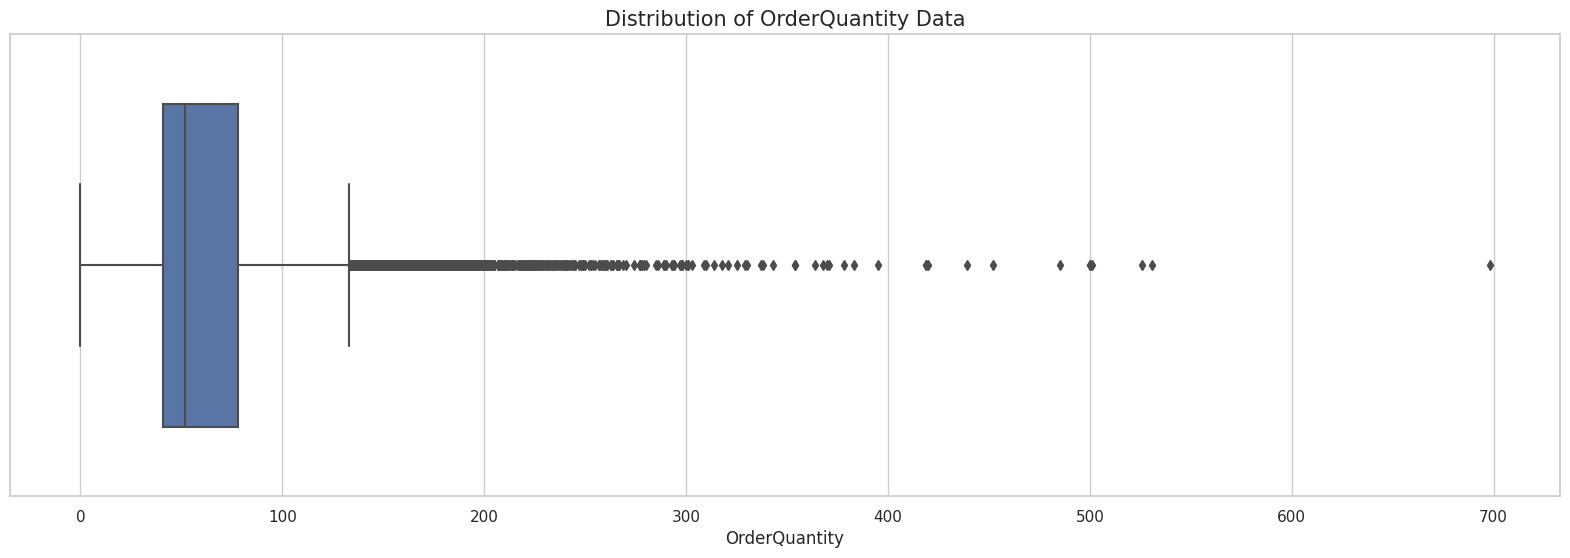

OrderQuantity:- Here we can observe the distribution of OrderQuantity data.In sampled data,we can observe the OrderQuantities are ranges from 0 to above 600


In [48]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(x='OrderQuantity', data=data, width=0.7)
ax.set_title('Distribution of OrderQuantity Data', fontsize=15)
plt.show()
print('OrderQuantity:- Here we can observe the distribution of OrderQuantity data.In sampled data,we can observe the OrderQuantities are ranges from 0 to above 600')

In [49]:
Q1 = data['OrderQuantity'].quantile(0.25)
Q3 = data['OrderQuantity'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = (data['OrderQuantity'] < (Q1 - 1.5 * IQR)) | (data['OrderQuantity'] > (Q3 + 1.5 * IQR))

# Replace outliers with the median value
median = data['OrderQuantity'].median()
data.loc[outliers, 'OrderQuantity'] = median


In [50]:
# Checking outliers 
num_elem = ['OrderQuantity']
def find_outliers_IQR(data):
    
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]

    return outliers

for i in num_elem:
    #binaryvalue=['OnlineCommunication','AutomaticRefill','DoorstepDelivery']
    outliers=find_outliers_IQR(data[i])
    print('----'+i+'----')
    print(outliers)
    print('Total number of rows/values: '+ str(data[i].shape))
    print('number of outliers: '+ str(len(outliers)))
    print('max outlier value: '+ str(outliers.max()))
    print('min outlier value: '+ str(outliers.min()))

----OrderQuantity----
1989246    128
1298479    116
2505312    127
3655479    114
2886012    122
          ... 
2898784    125
2377196    118
2826912    115
531365     126
1898570    131
Name: OrderQuantity, Length: 666, dtype: int64
Total number of rows/values: (20538,)
number of outliers: 666
max outlier value: 133
min outlier value: 114


In [51]:
data.duplicated().sum()

0

In [52]:
data.nunique()

CustomerID                 20538
City                           4
DateOfRegistration          2616
OnlineCommunication            2
AutomaticRefill                2
DoorstepDelivery               2
PreferredDeliveryDay           7
DateOfemail                 2554
EmailType                      2
timestamp_x                10923
MailOpened                     2
MailClicked                    3
RetentionPotential             3
DateOfOrder                 2370
timestamp_y                13237
OrderQuantity                134
DateOfOrderyear               11
DateOfOrdermonth              12
DateOfOrderday                31
DateOfRegistrationyear        11
DateOfRegistrationmonth       12
DateOfRegistrationday         31
dtype: int64

In [53]:
data.isnull().sum()

CustomerID                 0
City                       0
DateOfRegistration         0
OnlineCommunication        0
AutomaticRefill            0
DoorstepDelivery           0
PreferredDeliveryDay       0
DateOfemail                0
EmailType                  0
timestamp_x                0
MailOpened                 0
MailClicked                0
RetentionPotential         0
DateOfOrder                0
timestamp_y                0
OrderQuantity              0
DateOfOrderyear            0
DateOfOrdermonth           0
DateOfOrderday             0
DateOfRegistrationyear     0
DateOfRegistrationmonth    0
DateOfRegistrationday      0
dtype: int64

# VISUALIZATION

In [54]:
from collections import Counter

# between Retentional potetntial and cities

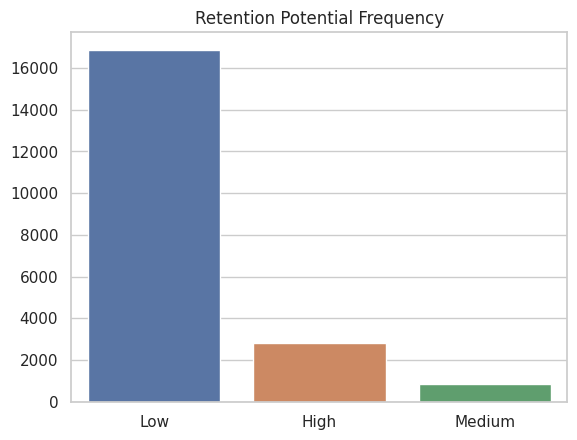

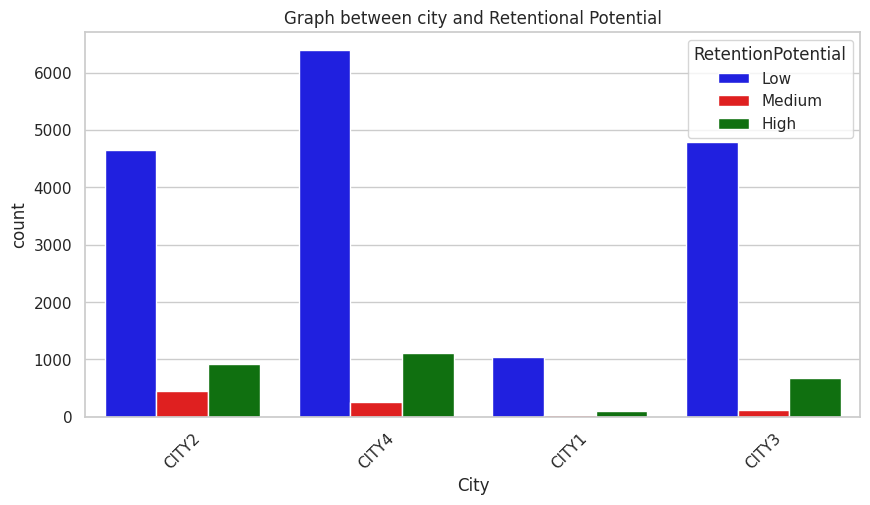

Here, RetentionPotential of customers is too low in city2, city4, and city3


In [55]:
import seaborn as sns

# Count the frequency of each RetentionPotential value
a = data['RetentionPotential'].value_counts()

# Plot a bar graph
sns.barplot(x=a.index, y=a.values)
plt.title('Retention Potential Frequency')
plt.show()

# Plot a countplot graph between cities and retention potential
plt.figure(figsize=(10,5))
sns.countplot(x='City', hue='RetentionPotential', data=data, palette=['blue', 'red', 'green'])
plt.xticks(rotation=45)
plt.title('Graph between city and Retentional Potential')
plt.show()

print('Here, RetentionPotential of customers is too low in city2, city4, and city3')


#  between dateoforder and city

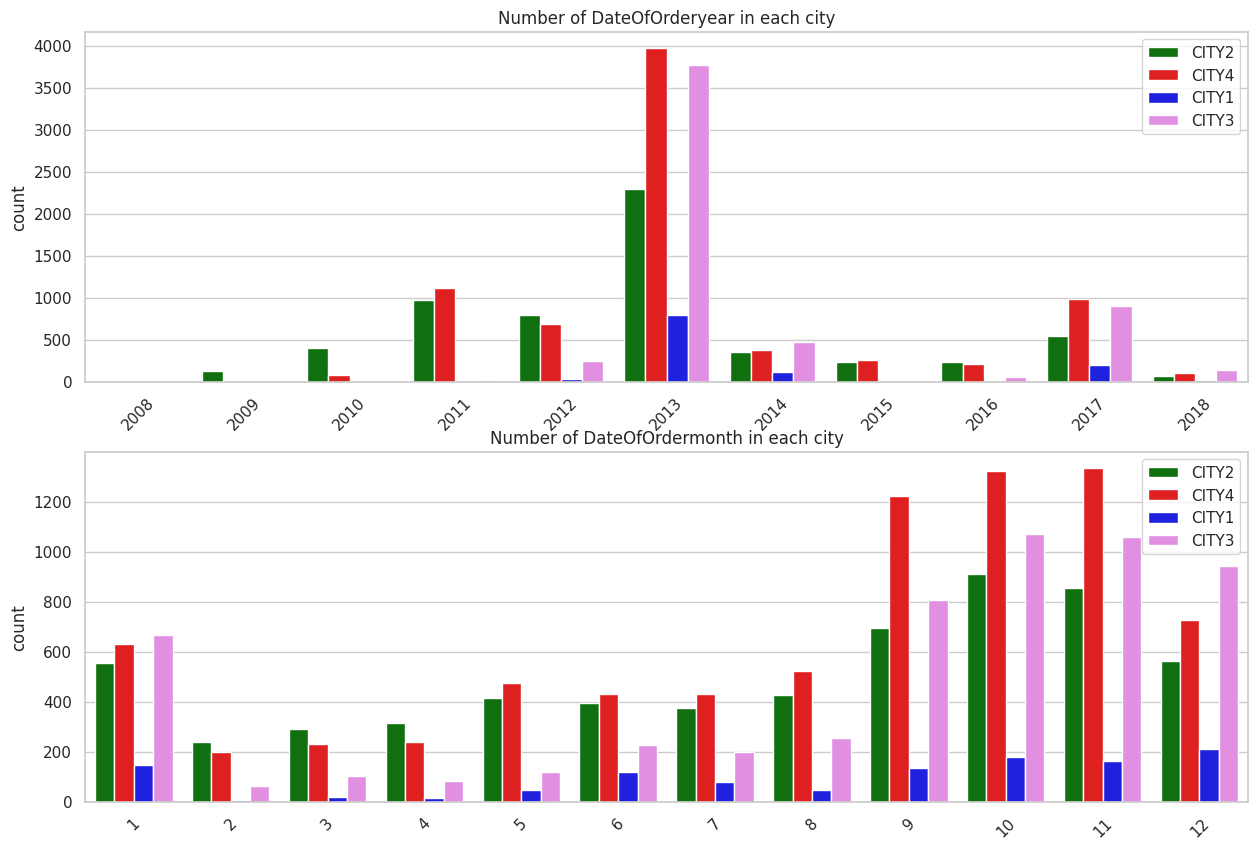

Here in the year 2013 and 2012, number of orders are more. In the month of October, sales are more compared to other months.


In [56]:
# Observing the graph between dateoforder and city


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
colors = ['green', 'red', 'blue', 'violet']

for i, ax in enumerate(axes):
    if i == 0:
        ax.set_title('Number of DateOfOrderyear in each city')
        sns.countplot(x='DateOfOrderyear', hue='City', data=data, palette=colors, ax=ax)
    else:
        ax.set_title('Number of DateOfOrdermonth in each city')
        sns.countplot(x='DateOfOrdermonth', hue='City', data=data, palette=colors, ax=ax)
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelrotation=45)
    ax.legend(loc='upper right')

plt.show()

print('Here in the year 2013 and 2012, number of orders are more. In the month of October, sales are more compared to other months.')


orders placed in every year and month

Here number of orders are increasing upto the year-2013 then again orders decreased.We can observe the trend in october and november of every year but in 2013 it is more 


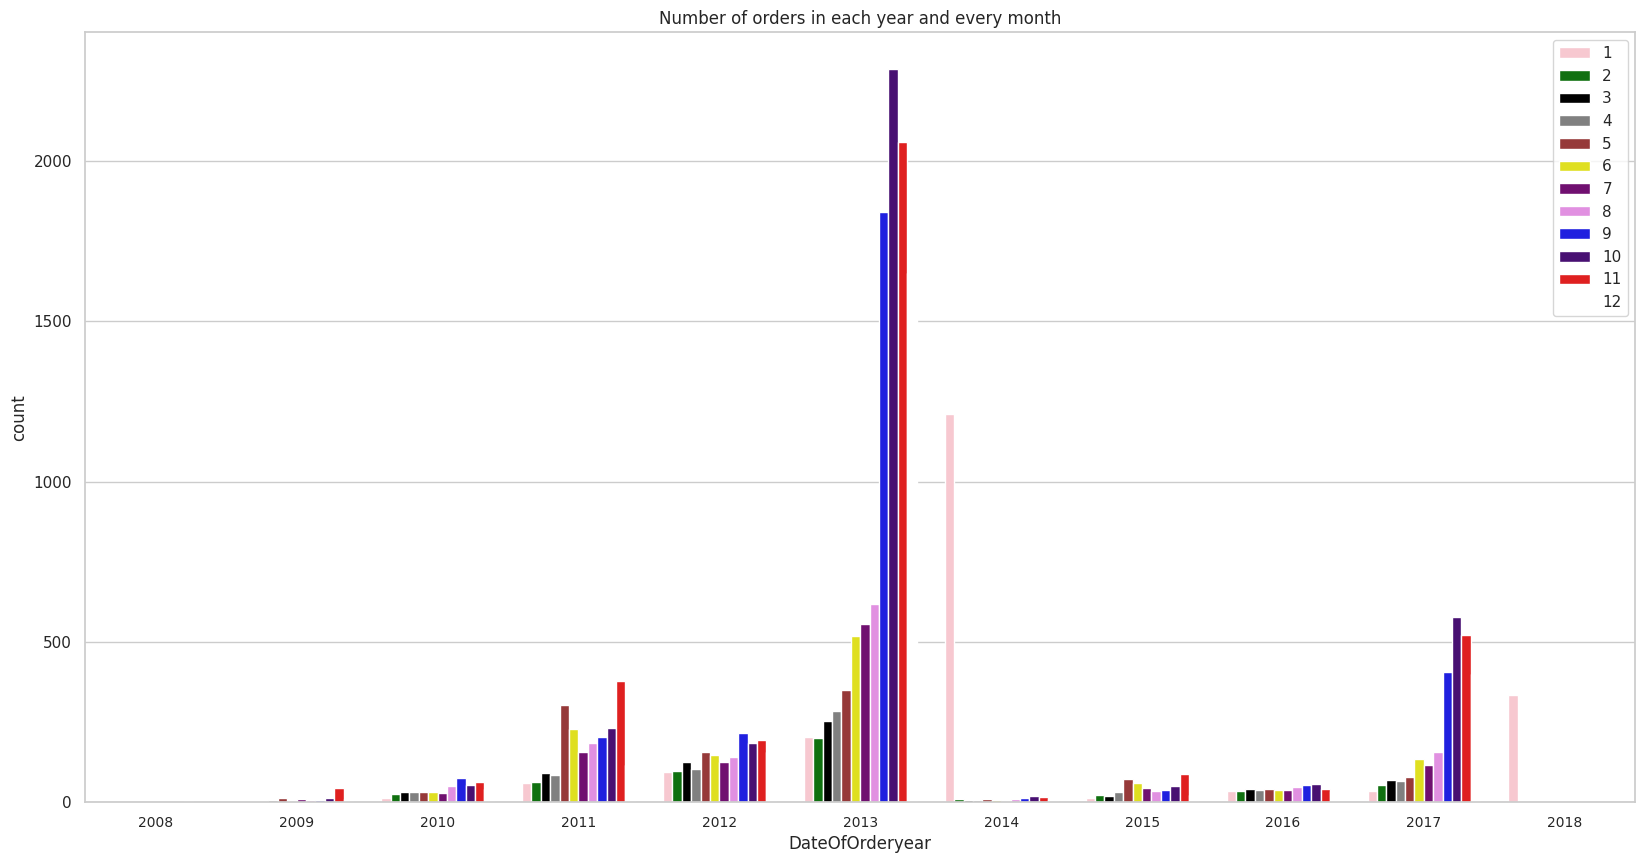

In [57]:
# Observing the number of orders placed in each year and every month
plt.figure(figsize=(20,10))
plt.xticks(fontsize=10)
plt.title('Number of orders in each year and every month')
sns.countplot(x ='DateOfOrderyear', data=data, hue='DateOfOrdermonth', palette=['pink','green','black','grey','brown','yellow','purple','violet','blue','indigo','red','white'])
plt.legend(loc='upper right')


print('Here number of orders are increasing upto the year-2013 then again orders decreased.We can observe the trend in october and november of every year but in 2013 it is more ')

# emails opened and not opened

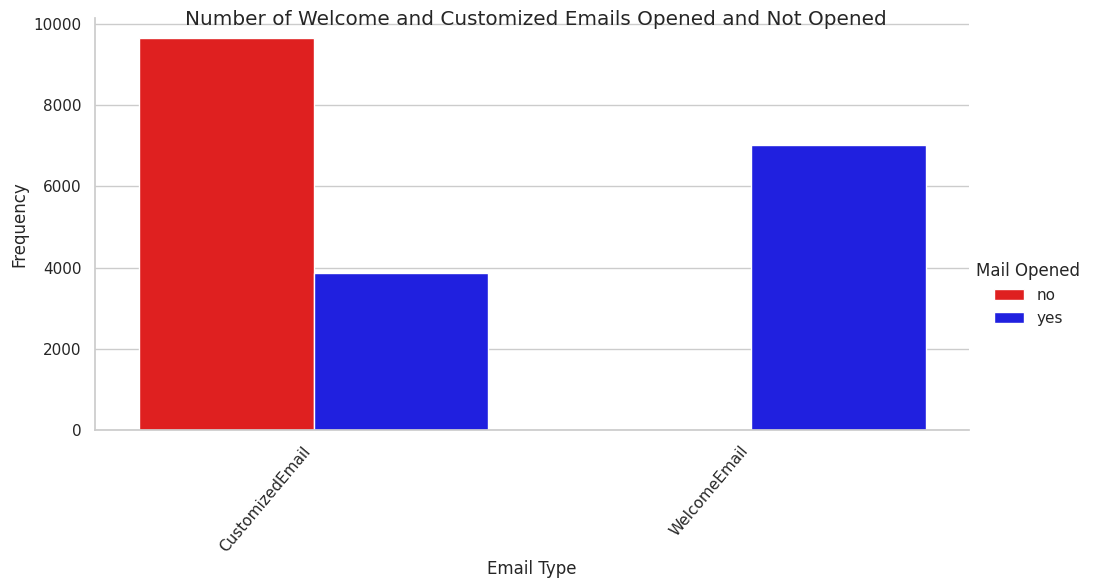

---INSIGHTS---
The number of customized emails is more than the number of welcome emails, indicating that there are more old customers than new customers. This suggests that promoting through emails may not be effective in attracting new customers.
The number of opened emails is less than the number of not opened emails, suggesting that promoting through emails alone may not be sufficient.


In [58]:
# count the number of opened and not opened emails for each email type
email_counts = data.groupby(['EmailType', 'MailOpened']).size().reset_index(name='Count')

# create a grouped bar plot
fig = sns.catplot(x='EmailType', y='Count', hue='MailOpened', data=email_counts, kind='bar', height=5, aspect=2, palette=['red', 'blue'])
fig.set_xticklabels(rotation=50, ha='right')
fig.set_axis_labels('Email Type', 'Frequency')
fig._legend.set_title('Mail Opened')
fig.fig.suptitle('Number of Welcome and Customized Emails Opened and Not Opened')

plt.show()

# print insights based on the observations
print('---INSIGHTS---')
print('The number of customized emails is more than the number of welcome emails, indicating that there are more old customers than new customers. This suggests that promoting through emails may not be effective in attracting new customers.')
print('The number of opened emails is less than the number of not opened emails, suggesting that promoting through emails alone may not be sufficient.')


# registration in each year and every month

Here we can observe how many customers are registered in each year every month.


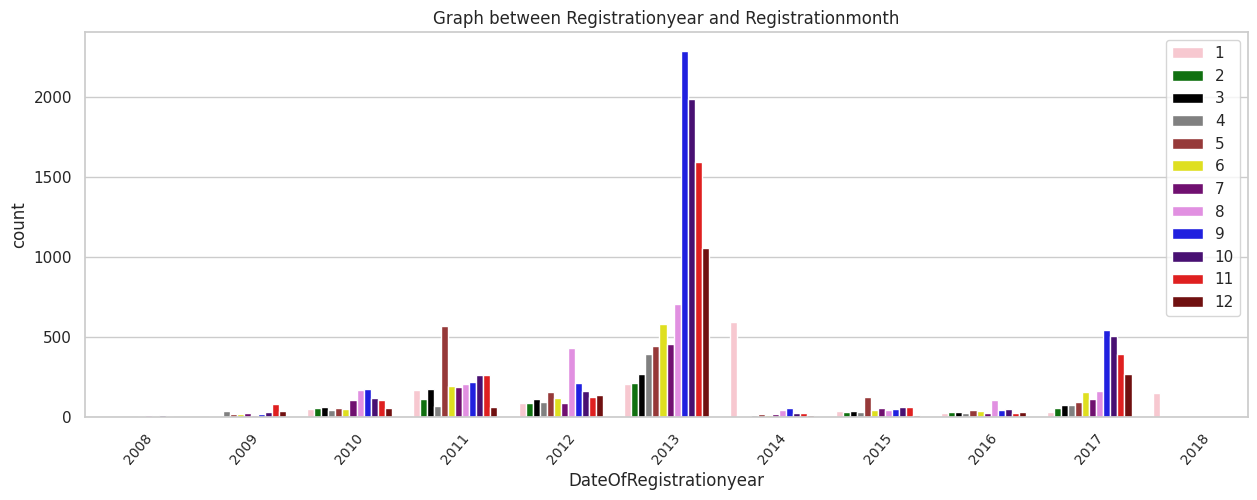

In [59]:
# Observing the number of registration in each year ,every month
a=Counter(data['MailOpened'])
plt.figure(figsize=(15,5))
plt.xticks(fontsize=10, rotation=50)
plt.title('Graph between Registrationyear and Registrationmonth')
sns.countplot(x ='DateOfRegistrationyear', data=data, hue='DateOfRegistrationmonth', palette=['pink','green','black','grey','brown','yellow','purple','violet','blue','indigo','red','maroon'])
plt.legend(loc='upper right')



print('Here we can observe how many customers are registered in each year every month.')


# preferred delivery day

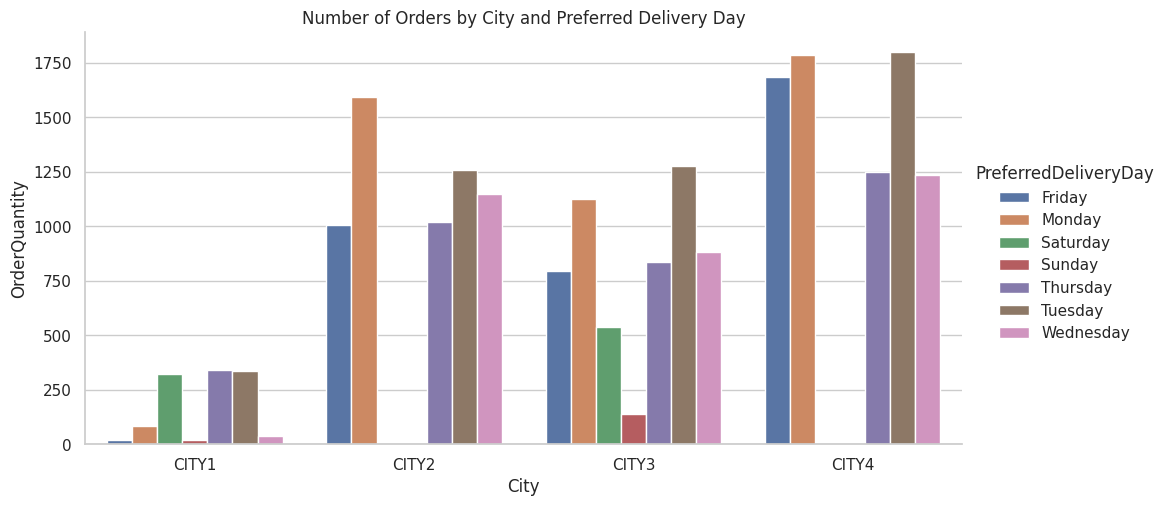

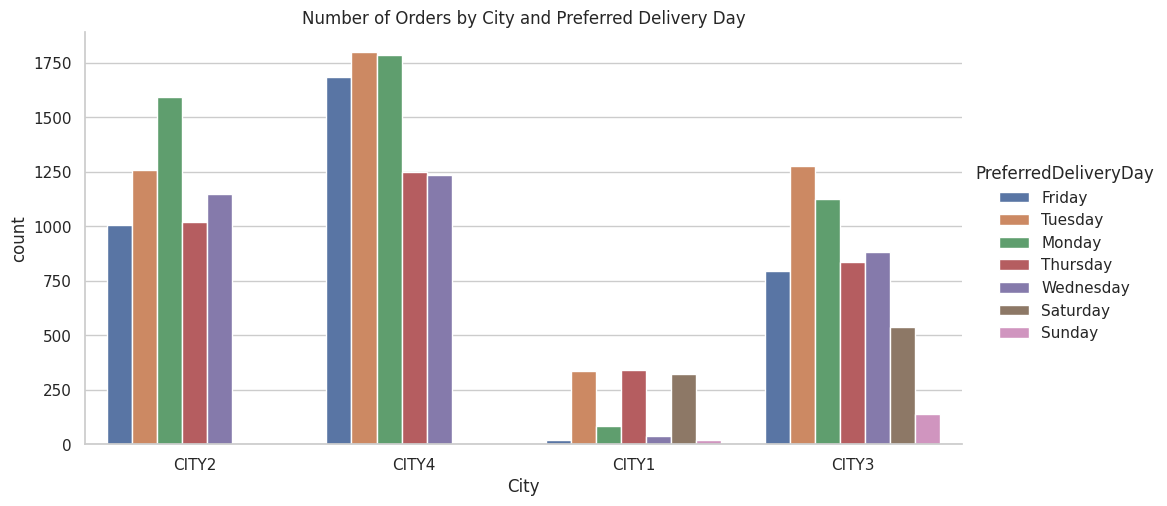

In [60]:
# Group the data by city and PreferredDeliveryDay, and count the number of orders
grouped_data = data.groupby(['City', 'PreferredDeliveryDay'])['OrderQuantity'].count().reset_index()

# Plot a grouped bar chart
sns.catplot(x='City', y='OrderQuantity', hue='PreferredDeliveryDay', data=grouped_data, kind='bar', height=5, aspect=2)
plt.title('Number of Orders by City and Preferred Delivery Day')
plt.show()

# Plot a stacked bar chart
sns.catplot(x='City', hue='PreferredDeliveryDay', data=data, kind='count', height=5, aspect=2)
plt.title('Number of Orders by City and Preferred Delivery Day')
plt.show()


# online communication and door step delivery

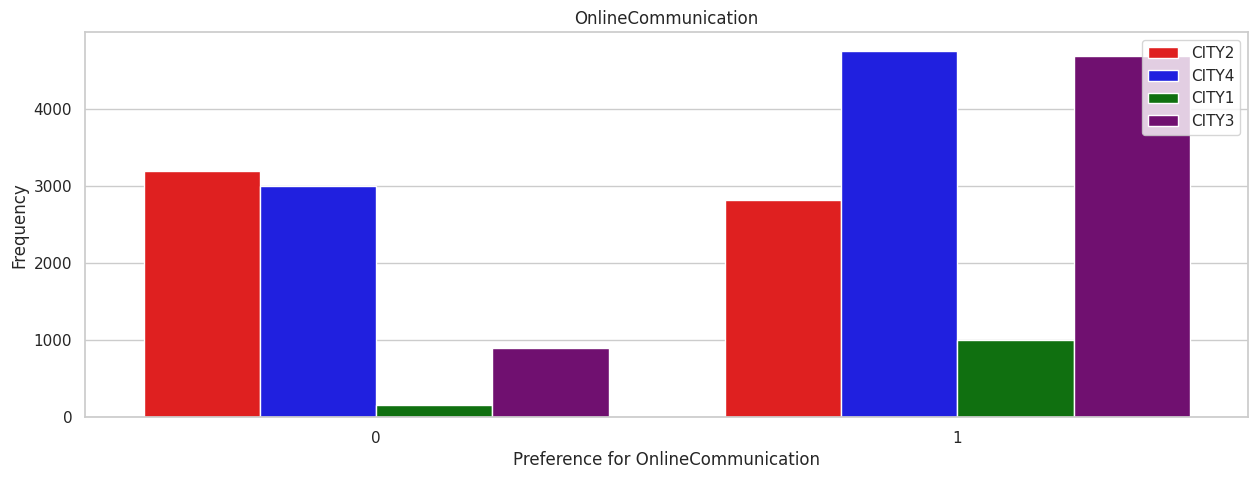

---INSIGHTS---
Online Communication: The number of customers who prefer online communication for orders is more than the number of customers who do not prefer it.


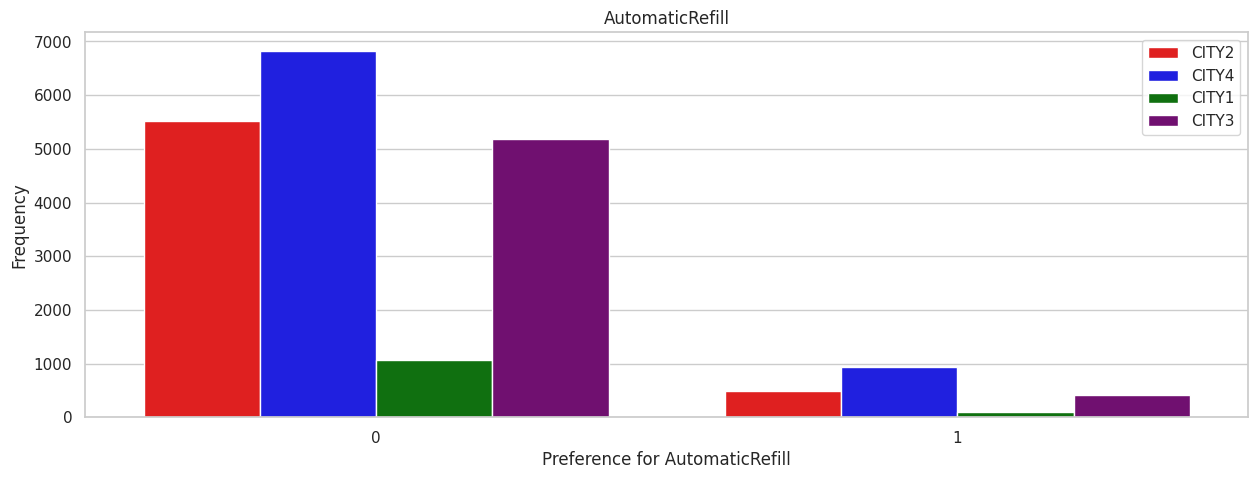

---INSIGHTS---
Automatic Refill: The number of customers who prefer automatic refill is less than the number of customers who do not prefer it.


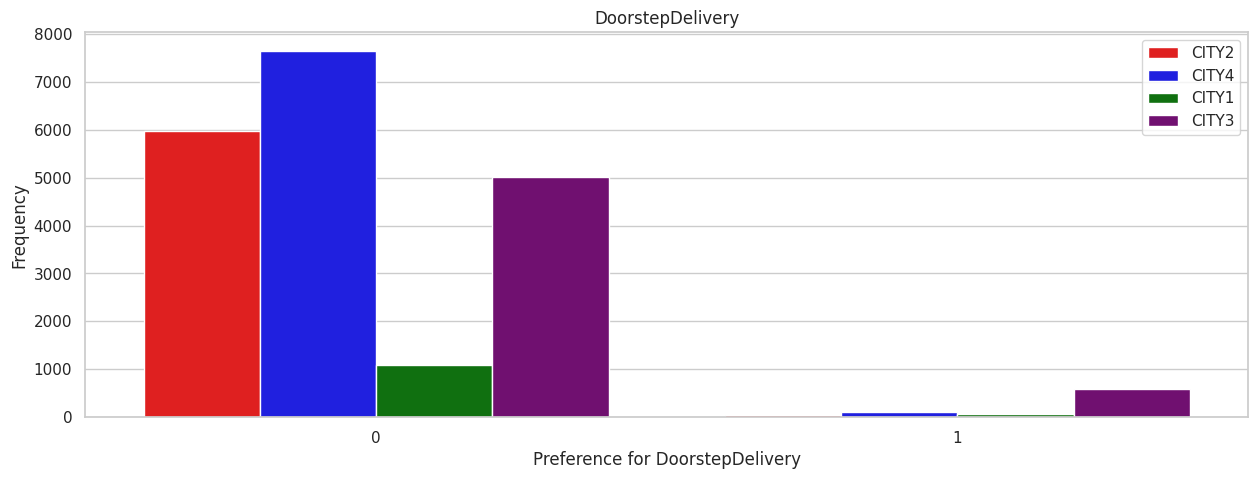

---INSIGHTS---
Doorstep Delivery: The number of customers who prefer online communication is more than the number of customers who prefer doorstep delivery. From this we can infer that many customers who prefer online communication are not actually using it to place orders.


In [61]:


# list of features to observe
features = ['OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery']

# loop through each feature and create a bar plot
for feature in features:
    # count the number of occurrences of each preference
    preference_counts = Counter(data[feature])
    
    # create a count plot
    fig, ax = plt.subplots(figsize=(15,5))
    sns.countplot(x=feature, data=data, hue='City', palette=['red', 'blue', 'green', 'purple'])
    ax.set_title(feature)
    ax.set_xlabel('Preference for ' + feature)
    ax.set_ylabel('Frequency')
    ax.legend(loc='upper right')
    plt.show()
    
    # print insights based on the observations
    if feature == 'OnlineCommunication':
        print('---INSIGHTS---')
        print('Online Communication: The number of customers who prefer online communication for orders is more than the number of customers who do not prefer it.')
    elif feature == 'AutomaticRefill':
        print('---INSIGHTS---')
        print('Automatic Refill: The number of customers who prefer automatic refill is less than the number of customers who do not prefer it.')
    elif feature == 'DoorstepDelivery':
        print('---INSIGHTS---')
        print('Doorstep Delivery: The number of customers who prefer online communication is more than the number of customers who prefer doorstep delivery. From this we can infer that many customers who prefer online communication are not actually using it to place orders.')


# Changing to datetime format

In [62]:
# Converting the dateofemail and date oforder to datetime format.
data['DateOfemail'] = pd.to_datetime(data['DateOfemail'])
data['DateOfOrder'] = pd.to_datetime(data['DateOfOrder'])
# Converting the date of registration to datetime format.
data['DateOfRegistration'] = pd.to_datetime(data['DateOfRegistration'])

In [63]:
# Convert date columns to datetime format
date_columns = ['DateOfOrder', 'DateOfemail', 'DateOfRegistration']
data[date_columns] = data[date_columns].apply(pd.to_datetime)

# Calculate time differences in days
data['customizedmail_Delay'] = (data['DateOfemail'] - data['DateOfOrder']).dt.days
data['welcomeemail_Delay'] = (data['DateOfRegistration'] - data['DateOfemail']).dt.days

# Check for negative time differences
negative_customizedmail = data[data['customizedmail_Delay'] < 0]
negative_welcomeemail = data[data['welcomeemail_Delay'] < 0]

if len(negative_customizedmail) > 0:
    print(f"There are {len(negative_customizedmail)} rows with negative customizedmail_Delay.")
if len(negative_welcomeemail) > 0:
    print(f"There are {len(negative_welcomeemail)} rows with negative welcomeemail_Delay.")


There are 11006 rows with negative customizedmail_Delay.
There are 13513 rows with negative welcomeemail_Delay.


# DROPPING 

In [64]:
# Dropping the attributes in the data
data.drop(['DateOfOrder','DateOfemail','DateOfOrderyear','DateOfOrdermonth','DateOfOrderday','DateOfRegistrationyear','DateOfRegistrationmonth','DateOfRegistrationday','timestamp_x','timestamp_y'],axis=1,inplace=True)

In [65]:
data.head(5)

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,RetentionPotential,OrderQuantity,customizedmail_Delay,welcomeemail_Delay
773630,C32109,CITY2,2011-02-04,1,0,0,Friday,CustomizedEmail,no,no,Low,89,333,-960
277869,C32893,CITY4,2011-10-14,0,0,0,Friday,CustomizedEmail,yes,yes,Low,33,37,-191
28030,C40881,CITY2,2010-09-22,0,0,1,Friday,CustomizedEmail,yes,yes,Low,88,-352,-137
3163458,C12364,CITY4,2014-11-09,0,0,0,Tuesday,CustomizedEmail,yes,no,Low,81,86,-787
1241052,C28289,CITY2,2010-02-10,1,1,0,Monday,CustomizedEmail,no,no,Medium,87,701,-911


In [66]:
data.dtypes

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
EmailType                       object
MailOpened                      object
MailClicked                     object
RetentionPotential              object
OrderQuantity                    int64
customizedmail_Delay             int64
welcomeemail_Delay               int64
dtype: object

In [67]:
# Seperating the Target and independent attributes.
X= data.drop(["RetentionPotential"], axis = 1)
y =data["RetentionPotential"]

In [68]:
X

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,OrderQuantity,customizedmail_Delay,welcomeemail_Delay
773630,C32109,CITY2,2011-02-04,1,0,0,Friday,CustomizedEmail,no,no,89,333,-960
277869,C32893,CITY4,2011-10-14,0,0,0,Friday,CustomizedEmail,yes,yes,33,37,-191
28030,C40881,CITY2,2010-09-22,0,0,1,Friday,CustomizedEmail,yes,yes,88,-352,-137
3163458,C12364,CITY4,2014-11-09,0,0,0,Tuesday,CustomizedEmail,yes,no,81,86,-787
1241052,C28289,CITY2,2010-02-10,1,1,0,Monday,CustomizedEmail,no,no,87,701,-911
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816603,C20462,CITY3,2013-09-18,1,0,0,Monday,WelcomeEmail,yes,NotApplicable,41,0,0
3075834,C41356,CITY2,2013-11-17,1,1,0,Monday,WelcomeEmail,yes,NotApplicable,41,0,0
2959214,C23469,CITY4,2013-10-11,1,0,0,Tuesday,WelcomeEmail,yes,NotApplicable,41,0,0
834375,C25868,CITY2,2010-06-22,0,0,0,Monday,WelcomeEmail,yes,NotApplicable,51,-1004,0


In [69]:
y

773630        Low
277869        Low
28030         Low
3163458       Low
1241052    Medium
            ...  
2816603       Low
3075834       Low
2959214       Low
834375       High
3133825       Low
Name: RetentionPotential, Length: 20538, dtype: object

# SPLITTING OF DATA

In [70]:
from sklearn.model_selection import train_test_split
#Splitting the data into X_train, X_test, y_train, y_test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [71]:
## Observing the datatypes in X_train, X_test, y_train, y_test.
print(X_train.dtypes)
print(X_test.dtypes)
print(y_train.dtypes)
print(y_test.dtypes)

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
EmailType                       object
MailOpened                      object
MailClicked                     object
OrderQuantity                    int64
customizedmail_Delay             int64
welcomeemail_Delay               int64
dtype: object
CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
EmailType                       object
MailOpened                      object
MailClicked                     object
OrderQuantity                    int64
customizedmail_Delay             int64
welcomeemai

In [72]:
# Listing the numeric attributes in dataframe
X_train_num_att= ['OrderQuantity']
X_test_num_att= ['OrderQuantity']

In [73]:
# changing the columns into categorical
cat_cols = ['EmailType', 'MailOpened', 'MailClicked', 'City', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay']

for col in cat_cols:
    X_train[col] = pd.Categorical(X_train[col])
    X_test[col] = pd.Categorical(X_test[col])
    
print(X_train[cat_cols].dtypes)
print(X_test[cat_cols].dtypes)


EmailType               category
MailOpened              category
MailClicked             category
City                    category
OnlineCommunication     category
AutomaticRefill         category
DoorstepDelivery        category
PreferredDeliveryDay    category
dtype: object
EmailType               category
MailOpened              category
MailClicked             category
City                    category
OnlineCommunication     category
AutomaticRefill         category
DoorstepDelivery        category
PreferredDeliveryDay    category
dtype: object


-----INSIGHTS-----
Here in RetentionPotential, we can clearly observe that there is a class imbalance.


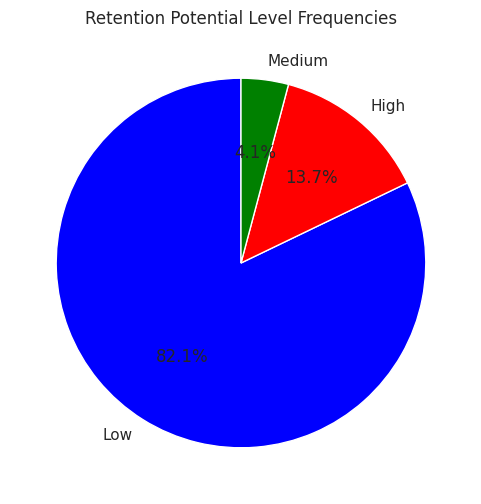

In [74]:

# Get counts of retention potential levels
counts = data['RetentionPotential'].value_counts()

# Plot pie chart of retention potential level frequencies
plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=counts.index, colors=['blue', 'red', 'green'], autopct='%1.1f%%', startangle=90)
plt.title('Retention Potential Level Frequencies')

# Print insights
print('-----INSIGHTS-----')
print('Here in RetentionPotential, we can clearly observe that there is a class imbalance.')


# LABEL ENCODING

In [75]:
# Applying the LabelEncoder for target attribute.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [76]:
le.classes_


array(['High', 'Low', 'Medium'], dtype=object)

In [77]:
le.inverse_transform([0,1,2])

array(['High', 'Low', 'Medium'], dtype=object)

# DUMMIFICATION

In [78]:
# Converting the categorical columns to numerical columns for train data.
X_train_dummies = pd.get_dummies(X_train[cat_cols],drop_first = True)

In [79]:
X_train_dummies

,EmailType_WelcomeEmail,MailOpened_yes,MailClicked_no,MailClicked_yes,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
2341403,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
752255,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2087809,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
3132038,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
3847990,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898937,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0
71300,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3076383,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
2872791,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0


In [80]:
# Conveting the categorical columns to numerical columns for test data.
X_test_dummies = pd.get_dummies(X_test[cat_cols],drop_first = True)


In [81]:
X_test_dummies

,EmailType_WelcomeEmail,MailOpened_yes,MailClicked_no,MailClicked_yes,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
2877483,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2966974,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0
3727308,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3867455,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0
3084875,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566294,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
529006,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
3109633,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2381659,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0


In [82]:
X_train_dummies = X_train_dummies.reset_index()


In [83]:
X_train_dummies

,index,EmailType_WelcomeEmail,MailOpened_yes,MailClicked_no,MailClicked_yes,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,2341403,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,752255,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,2087809,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
3,3132038,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
4,3847990,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14371,1898937,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0
14372,71300,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
14373,3076383,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
14374,2872791,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0


In [84]:
X_test_dummies = X_test_dummies.reset_index()

In [85]:
X_test_dummies

,index,EmailType_WelcomeEmail,MailOpened_yes,MailClicked_no,MailClicked_yes,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,2877483,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,2966974,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0
2,3727308,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,3867455,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0
4,3084875,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,2566294,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
6158,529006,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
6159,3109633,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
6160,2381659,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0


In [86]:
X_train_dummies = X_train_dummies.drop(['index'],axis=1)

In [87]:
X_train_dummies

,EmailType_WelcomeEmail,MailOpened_yes,MailClicked_no,MailClicked_yes,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
4,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14371,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0
14372,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
14373,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
14374,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0


In [88]:
X_test_dummies = X_test_dummies.drop(['index'],axis=1)

In [89]:
X_test_dummies

,EmailType_WelcomeEmail,MailOpened_yes,MailClicked_no,MailClicked_yes,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0
2,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0
4,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
6158,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
6159,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
6160,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0


In [90]:
# Applying StandardScaler to the numerical columns.
from sklearn. preprocessing import StandardScaler
scaler = StandardScaler()
scaler_fit_train = scaler.fit(X_train[X_train_num_att])
scaler_fit_test = scaler.fit(X_test[X_test_num_att])


In [91]:
# Converting standardized train data into dataframe.
scaler_train = pd.DataFrame(scaler.transform(X_train[X_train_num_att]), columns=X_train[X_train_num_att].columns)
scaler_train

,OrderQuantity
0,1.802449
1,0.032754
2,1.390892
3,-0.666893
4,-0.708049
...,...
14371,-0.214181
14372,0.526622
14373,-0.666893
14374,-0.666893


In [92]:
scaler_train = scaler_train.reset_index()
scaler_train

,index,OrderQuantity
0,0,1.802449
1,1,0.032754
2,2,1.390892
3,3,-0.666893
4,4,-0.708049
...,...,...
14371,14371,-0.214181
14372,14372,0.526622
14373,14373,-0.666893
14374,14374,-0.666893


In [93]:
scaler_train = scaler_train.drop(['index'],axis=1)
scaler_train

,OrderQuantity
0,1.802449
1,0.032754
2,1.390892
3,-0.666893
4,-0.708049
...,...
14371,-0.214181
14372,0.526622
14373,-0.666893
14374,-0.666893


In [94]:
# Converting standardized test data into dataframe.
scaler_test = pd.DataFrame(scaler.transform(X_test[X_test_num_att]), columns=X_train[X_test_num_att].columns)
scaler_test

,OrderQuantity
0,-0.131869
1,-0.666893
2,-0.214181
3,-0.666893
4,0.238532
...,...
6157,1.020490
6158,0.938179
6159,-0.214181
6160,0.032754


In [95]:
scaler_test = scaler_test.reset_index()
scaler_test

,index,OrderQuantity
0,0,-0.131869
1,1,-0.666893
2,2,-0.214181
3,3,-0.666893
4,4,0.238532
...,...,...
6157,6157,1.020490
6158,6158,0.938179
6159,6159,-0.214181
6160,6160,0.032754


In [96]:
scaler_test = scaler_test.drop(['index'], axis=1)
scaler_test

,OrderQuantity
0,-0.131869
1,-0.666893
2,-0.214181
3,-0.666893
4,0.238532
...,...
6157,1.020490
6158,0.938179
6159,-0.214181
6160,0.032754


In [97]:
#Combing the standardized numericalof  train data and dummified categorical attributes of train data.
train_data = pd.concat([scaler_train,X_train_dummies], axis=1)
train_data

,OrderQuantity,EmailType_WelcomeEmail,MailOpened_yes,MailClicked_no,MailClicked_yes,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,1.802449,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.032754,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,1.390892,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
3,-0.666893,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
4,-0.708049,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14371,-0.214181,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0
14372,0.526622,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
14373,-0.666893,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
14374,-0.666893,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0


In [98]:
#Observing the final train data dimensions.
train_data.shape

(14376, 17)

In [99]:
y_train.shape

(14376,)

In [100]:
#Combing the standardized test data of numerical and dummified categorical attributes of test data.
test_data = pd.concat([scaler_test,X_test_dummies], axis=1)
test_data

,OrderQuantity,EmailType_WelcomeEmail,MailOpened_yes,MailClicked_no,MailClicked_yes,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,-0.131869,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,-0.666893,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0
2,-0.214181,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,-0.666893,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0
4,0.238532,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,1.020490,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
6158,0.938179,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
6159,-0.214181,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
6160,0.032754,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0


In [101]:
#Observing the final train data dimensions.
test_data.shape

(6162, 17)

In [102]:
y_test.shape

(6162,)

# MODEL BUILDING

In [103]:
# Function to evaluate the model metrics.
def evaluate_model(act, pred):
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred,pos_label='positive',average='weighted'))
    print("Precision: ", precision_score(act, pred, pos_label='positive',average='weighted'))  

In [104]:
# Model Building using KNeighborsClassifier without any hyperparamaters.
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=int(5))
knn_classifier.fit(train_data, y_train)

y_predtrain_knn = knn_classifier.predict(train_data)
y_predtest_knn = knn_classifier.predict(test_data)


In [105]:
# Observing the predictions on train and test. 
print("--Train--")
evaluate_model(y_train,y_predtrain_knn )
print("--Test--")
evaluate_model(y_test,y_predtest_knn)

--Train--
Confusion Matrix 
 [[  901  1017    29]
 [  446 11377    25]
 [  170   341    70]]
Accurcay :  0.8589315525876461
Recall   :  0.8589315525876461
Precision:  0.8395215334977142
--Test--
Confusion Matrix 
 [[ 301  545   25]
 [ 241 4763   18]
 [  88  166   15]]
Accurcay :  0.8242453748782863
Recall   :  0.8242453748782863
Precision:  0.7879620602439014


In [106]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(train_data, y_train)


In [107]:
X_adasyn.shape

(35785, 17)

In [108]:
y_adasyn.shape

(35785,)

#KNN MODEL

In [109]:
# Model Building using KNeighborsClassifier without any hyperparamaters.
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=int(5))
knn_classifier.fit(X_adasyn, y_adasyn)

y_predtrain_knn1 = knn_classifier.predict(X_adasyn)
y_predtest_knn1 = knn_classifier.predict(test_data)


In [110]:
# Observing the predictions on train and test. 
print("--Train--")
evaluate_model(y_adasyn,y_predtrain_knn1 )
print("--Test--")
evaluate_model(y_test,y_predtest_knn1)

--Train--
Confusion Matrix 
 [[7233 3565 1270]
 [1290 9746  812]
 [1340 1337 9192]]
Accurcay :  0.7313399469051278
Recall   :  0.7313399469051278
Precision:  0.7380237110200053
--Test--
Confusion Matrix 
 [[ 303  376  192]
 [ 744 3798  480]
 [  74  114   81]]
Accurcay :  0.6786757546251218
Recall   :  0.6786757546251218
Precision:  0.7647657785036999


In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# define the parameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# define the GridSearchCV object
model = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring='recall_macro')

# fit the GridSearchCV object on the data
model.fit(X_adasyn, y_adasyn)

# print the best parameters
print('Best Parameters:', model.best_params_)

Best Parameters: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


In [112]:
# build the KNN model with the best parameters
knn_classifier = KNeighborsClassifier(n_neighbors=model.best_params_['n_neighbors'], 
                                       weights=model.best_params_['weights'], 
                                       p=model.best_params_['p'])
knn_classifier.fit(X_adasyn, y_adasyn)

# predict on training and test data
y_predtrain_knn2 = knn_classifier.predict(X_adasyn)
y_predtest_knn2 = knn_classifier.predict(test_data)

In [113]:
print("--Train--")
evaluate_model(y_adasyn,y_predtrain_knn2 )
print("--Test--")
evaluate_model(y_test,y_predtest_knn2)

--Train--
Confusion Matrix 
 [[ 9426  2567    75]
 [  469 11335    44]
 [  337   597 10935]]
Accurcay :  0.8857342461925388
Recall   :  0.8857342461925388
Precision:  0.8976137030087074
--Test--
Confusion Matrix 
 [[ 283  460  128]
 [ 551 4128  343]
 [  82  129   58]]
Accurcay :  0.7252515417072379
Recall   :  0.7252515417072379
Precision:  0.7616854848512357


In [114]:
# Model Building using RandomForestClassifier without any hyperparamaters.
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1.fit(train_data, y_train)

train_pred_rf = clf1.predict(train_data)
test_pred_rf = clf1.predict(test_data)

In [115]:
# Observing the predictions on train and test. 
print("--Train--")
evaluate_model(y_train, train_pred_rf)
print("--Test--")
evaluate_model(y_test, test_pred_rf)

--Train--
Confusion Matrix 
 [[ 1103   806    38]
 [  206 11603    39]
 [   69   164   348]]
Accurcay :  0.9080411797440178
Recall   :  0.9080411797440178
Precision:  0.9020671654279017
--Test--
Confusion Matrix 
 [[ 256  559   56]
 [ 250 4702   70]
 [  69  158   42]]
Accurcay :  0.8114248620577734
Recall   :  0.8114248620577734
Precision:  0.781006540898046


In [116]:
# Model Building using RandomForestClassifier after applying the adasyn.
clf3 = RandomForestClassifier()
clf3.fit(X_adasyn,y_adasyn)

train_pred_rf1 = clf3.predict(X_adasyn)
test_pred_rf1 = clf3.predict(test_data)

In [117]:
# Observing the predictions on train and test 
print("--Train--")
evaluate_model(y_adasyn,train_pred_rf1)
print("--Test--")
evaluate_model(y_test,test_pred_rf1) 

--Train--
Confusion Matrix 
 [[11352   472   244]
 [ 1255 10354   239]
 [   68   235 11566]]
Accurcay :  0.929775045410088
Recall   :  0.929775045410088
Precision:  0.9303414762270942
--Test--
Confusion Matrix 
 [[ 407  322  142]
 [ 891 3753  378]
 [  69  119   81]]
Accurcay :  0.6882505679974035
Recall   :  0.6882505679974035
Precision:  0.7772663091292282


#SVM MODEL

In [118]:
# Model Building using support vector classifier without any hyperparamaters.
from sklearn.svm import SVC
model = SVC()
model.fit(train_data,y_train)
  
train_pred_svc = model.predict(train_data)
test_pred_svc = model.predict(test_data)

In [119]:
# Observing the predictions on train and test. 
print("--Train--")
evaluate_model(y_train, train_pred_svc)
print("--Test--")
evaluate_model(y_test, test_pred_svc)

--Train--
Confusion Matrix 
 [[  803  1137     7]
 [  430 11413     5]
 [  203   363    15]]
Accurcay :  0.8507929883138564
Recall   :  0.8507929883138564
Precision:  0.8266024993054472
--Test--
Confusion Matrix 
 [[ 349  517    5]
 [ 177 4840    5]
 [  98  163    8]]
Accurcay :  0.8433950016228497
Recall   :  0.8433950016228497
Precision:  0.8130556986328863


In [120]:
# Model Building using svc after applying the adasyn.
model1 = SVC()
model1.fit(X_adasyn, y_adasyn)
  
train_pred_svc1 = model1.predict(X_adasyn)
test_pred_svc1 = model1.predict(test_data)

In [121]:
# Observing the predictions on train and test. 
print("--Train--")
evaluate_model(y_adasyn,train_pred_svc1)
print("--Test--")
evaluate_model(y_test,test_pred_svc1) 

--Train--
Confusion Matrix 
 [[6241 2928 2899]
 [2431 8208 1209]
 [1835 2160 7874]]
Accurcay :  0.6238088584602487
Recall   :  0.6238088584602487
Precision:  0.6226648207042214
--Test--
Confusion Matrix 
 [[ 426  182  263]
 [1067 3421  534]
 [  47   87  135]]
Accurcay :  0.6462187601428108
Recall   :  0.6462187601428108
Precision:  0.8010063476613516


In [122]:
# defining parameter range
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 

In [123]:
# Model Building using support vector classifier with hyperparamaters.
svm_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
svm_grid.fit(X_adasyn,y_adasyn)
train_pred_svc2 = svm_grid.predict(X_adasyn)
test_pred_svc2 = svm_grid.predict(test_data)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.592 total time= 1.0min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.557 total time= 1.0min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.580 total time= 1.1min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.563 total time= 1.0min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.577 total time=  60.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.573 total time= 1.0min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.543 total time= 1.0min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.565 total time= 1.0min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.537 total time= 1.0min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.566 total time= 1.0min
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.606 total time=  57.8s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;,

In [124]:
print("--Train--")
evaluate_model(y_adasyn,train_pred_svc2 )
print("--Test--")
evaluate_model(y_test,test_pred_svc2)

--Train--
Confusion Matrix 
 [[7228 2031 2809]
 [2754 7612 1482]
 [1653 1293 8923]]
Accurcay :  0.6640491826184155
Recall   :  0.6640491826184155
Precision:  0.6639249184021723
--Test--
Confusion Matrix 
 [[ 439  168  264]
 [1236 3130  656]
 [  50   92  127]]
Accurcay :  0.5998052580331061
Recall   :  0.5998052580331061
Precision:  0.7937559987335079


# Reading Test Data

In [125]:
df_customer_test = pd.read_excel('/content/drive/MyDrive/Test data Capstone/Customerdata_Test.xlsx')

In [126]:
df_customer_test

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C17838,CITY4,2010-10-22,0,0,0,Thursday
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday
2,C19041,CITY4,2011-01-24,0,1,0,Friday
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday
4,C26718,CITY2,2010-10-02,1,0,0,Monday
...,...,...,...,...,...,...,...
5950,C32947,CITY2,2018-01-17,1,0,0,Friday
5951,C28951,CITY3,2018-01-17,1,0,0,Friday
5952,C38741,CITY3,2018-01-17,1,0,0,Monday
5953,C20407,CITY2,2018-01-17,1,0,0,Friday


In [127]:
df_customer_test.shape

(5955, 7)

In [128]:
df_customer_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5955 entries, 0 to 5954
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            5955 non-null   object        
 1   City                  5955 non-null   object        
 2   DateOfRegistration    5955 non-null   datetime64[ns]
 3   OnlineCommunication   5955 non-null   int64         
 4   AutomaticRefill       5955 non-null   int64         
 5   DoorstepDelivery      5955 non-null   int64         
 6   PreferredDeliveryDay  5955 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 325.8+ KB


In [129]:
df_customer_test.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [130]:
df_customer_test.nunique()

CustomerID              5955
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
dtype: int64

In [131]:
df_customer_test.duplicated().sum()

0

In [132]:
df_email_test = pd.read_excel('/content/drive/MyDrive/Test data Capstone/Emaildata_Test.xlsx')

In [ ]:
df_email_test

In [134]:
df_email_test.shape

(129074, 6)

In [135]:
df_email_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129074 entries, 0 to 129073
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CustomerID   129074 non-null  object
 1   DateOfemail  129074 non-null  object
 2   EmailType    129074 non-null  object
 3   timestamp    129074 non-null  object
 4   MailOpened   129074 non-null  object
 5   MailClicked  129074 non-null  object
dtypes: object(6)
memory usage: 5.9+ MB


In [136]:
df_email_test.isnull().sum()

CustomerID     0
DateOfemail    0
EmailType      0
timestamp      0
MailOpened     0
MailClicked    0
dtype: int64

In [137]:
df_email_test.nunique()

CustomerID      5955
DateOfemail     3149
EmailType          2
timestamp      14366
MailOpened         2
MailClicked        3
dtype: int64

In [138]:
df_email_test.duplicated().sum()

0

In [139]:
df_test_test = pd.read_excel('/content/drive/MyDrive/Test data Capstone/Test.xlsx')

In [ ]:
df_test_test

In [141]:
df_test_test.shape

(5955, 1)

In [142]:
df_test_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5955 entries, 0 to 5954
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  5955 non-null   object
dtypes: object(1)
memory usage: 46.6+ KB


In [143]:
df_test_test.isnull().sum()

CustomerID    0
dtype: int64

In [144]:
df_test_test.nunique()

CustomerID    5955
dtype: int64

In [145]:
df_test_test.duplicated().sum()

0

In [146]:
df_transaction_test = pd.read_excel('/content/drive/MyDrive/Test data Capstone/transactionsdata_Test.xlsx')

In [ ]:
df_transaction_test

In [148]:
df_transaction_test.shape

(26768, 4)

In [149]:
df_transaction_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26768 entries, 0 to 26767
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     26768 non-null  object
 1   DateOfOrder    26768 non-null  object
 2   timestamp      26768 non-null  object
 3   OrderQuantity  26768 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 836.6+ KB


In [150]:
df_transaction_test.nunique()

CustomerID        5955
DateOfOrder       2771
timestamp        15326
OrderQuantity      372
dtype: int64

In [151]:
df_transaction_test.duplicated().sum()

0

In [152]:
# Merging the test data files
data1=pd.merge(df_customer_test,df_email_test, how='outer',on='CustomerID')
data2=pd.merge(df_test_test,df_transaction_test,how='outer',on='CustomerID')
merged_df_test=pd.merge(data1,data2,how='outer',on='CustomerID')

In [153]:
merged_df_test

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,timestamp_x,MailOpened,MailClicked,DateOfOrder,timestamp_y,OrderQuantity
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable,2011-03-28,17:41:08,55
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable,2010-10-12,15:58:02,174
2,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable,2010-11-27,20:13:48,171
3,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable,2011-12-09,14:34:44,166
4,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable,2011-03-04,18:20:18,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013735,C32947,CITY2,2018-01-17,1,0,0,Friday,2018-01-17,WelcomeEmail,13:05:56,yes,NotApplicable,2018-01-17,21:35:26,41
1013736,C28951,CITY3,2018-01-17,1,0,0,Friday,2018-01-17,WelcomeEmail,15:45:18,yes,NotApplicable,2018-01-17,17:05:50,40
1013737,C38741,CITY3,2018-01-17,1,0,0,Monday,2018-01-17,WelcomeEmail,11:51:28,yes,NotApplicable,2018-01-17,18:56:16,36
1013738,C20407,CITY2,2018-01-17,1,0,0,Friday,2018-01-17,WelcomeEmail,10:25:30,yes,NotApplicable,2018-01-17,10:24:52,75


In [154]:
merged_df_test.shape

(1013740, 15)

In [155]:
merged_df_test.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
DateOfemail             0
EmailType               0
timestamp_x             0
MailOpened              0
MailClicked             0
DateOfOrder             0
timestamp_y             0
OrderQuantity           0
dtype: int64

In [156]:
merged_df_test.duplicated().sum()

0

In [157]:
data_test=merged_df_test.sample(1013740,replace=True,random_state=123).drop_duplicates(subset='CustomerID')


In [158]:
data_test

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,timestamp_x,MailOpened,MailClicked,DateOfOrder,timestamp_y,OrderQuantity
773630,C39476,CITY3,2013-10-20,1,0,0,Monday,2014-01-07,CustomizedEmail,12:04:24,no,no,2013-11-25,10:52:44,131
277869,C16188,CITY3,2013-03-02,0,1,1,Friday,2013-06-19,CustomizedEmail,11:24:26,no,no,2013-04-26,16:40:04,74
28030,C20577,CITY4,2010-11-16,0,1,0,Monday,2011-09-18,CustomizedEmail,13:19:22,no,no,2012-11-17,16:01:32,68
17730,C14740,CITY2,2010-08-17,0,0,0,Wednesday,2011-01-15,CustomizedEmail,16:41:30,no,no,2011-10-23,20:05:02,40
192476,C16448,CITY4,2011-02-01,1,0,0,Wednesday,2011-08-30,CustomizedEmail,17:28:10,yes,no,2014-01-07,12:19:54,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679684,C30679,CITY2,2012-10-19,0,0,0,Friday,2012-10-19,WelcomeEmail,16:32:48,yes,NotApplicable,2012-10-19,21:50:26,86
226080,C24466,CITY3,2013-06-01,1,0,0,Monday,2013-06-01,WelcomeEmail,11:36:32,yes,NotApplicable,2013-07-05,12:54:34,88
719722,C26259,CITY2,2013-09-15,1,0,0,Monday,2013-09-15,WelcomeEmail,14:28:00,yes,NotApplicable,2013-09-15,21:26:24,41
757597,C21869,CITY3,2013-10-04,1,0,0,Monday,2013-10-04,WelcomeEmail,13:02:14,yes,NotApplicable,2013-10-04,17:36:20,81


In [159]:
data_test.nunique()

CustomerID              5144
City                       4
DateOfRegistration      1553
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
DateOfemail             1561
EmailType                  2
timestamp_x             4324
MailOpened                 2
MailClicked                3
DateOfOrder             1460
timestamp_y             4556
OrderQuantity            226
dtype: int64

In [160]:
data_test.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'DateOfemail', 'EmailType', 'timestamp_x', 'MailOpened', 'MailClicked',
       'DateOfOrder', 'timestamp_y', 'OrderQuantity'],
      dtype='object')

In [161]:
data_test.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
DateOfemail             0
EmailType               0
timestamp_x             0
MailOpened              0
MailClicked             0
DateOfOrder             0
timestamp_y             0
OrderQuantity           0
dtype: int64

In [162]:
data_test.dtypes

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
DateOfemail                     object
EmailType                       object
timestamp_x                     object
MailOpened                      object
MailClicked                     object
DateOfOrder                     object
timestamp_y                     object
OrderQuantity                    int64
dtype: object

In [163]:
# Converting DateOforder column to seperate year,month,day columns
datecolumns=['DateOfOrder','DateOfRegistration']

for i in datecolumns:
    data_test[i]=pd.to_datetime(data_test[i], format='%Y-%m-%d')
    data_test[i+'year']=pd.DatetimeIndex(data_test[i]).year
    data_test[i+'month']=pd.DatetimeIndex(data_test[i]).month
    data_test[i+'day']=pd.DatetimeIndex(data_test[i]).day

In [164]:
num=['OrderQuantity']
num

['OrderQuantity']

In [165]:
categorical_cols = ['EmailType', 'MailOpened', 'MailClicked', 'City', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay']
for col in categorical_cols:
    data_test[col] = pd.Categorical(data_test[col])


In [166]:
data_test.dtypes

CustomerID                         object
City                             category
DateOfRegistration         datetime64[ns]
OnlineCommunication              category
AutomaticRefill                  category
DoorstepDelivery                 category
PreferredDeliveryDay             category
DateOfemail                        object
EmailType                        category
timestamp_x                        object
MailOpened                       category
MailClicked                      category
DateOfOrder                datetime64[ns]
timestamp_y                        object
OrderQuantity                       int64
DateOfOrderyear                     int64
DateOfOrdermonth                    int64
DateOfOrderday                      int64
DateOfRegistrationyear              int64
DateOfRegistrationmonth             int64
DateOfRegistrationday               int64
dtype: object

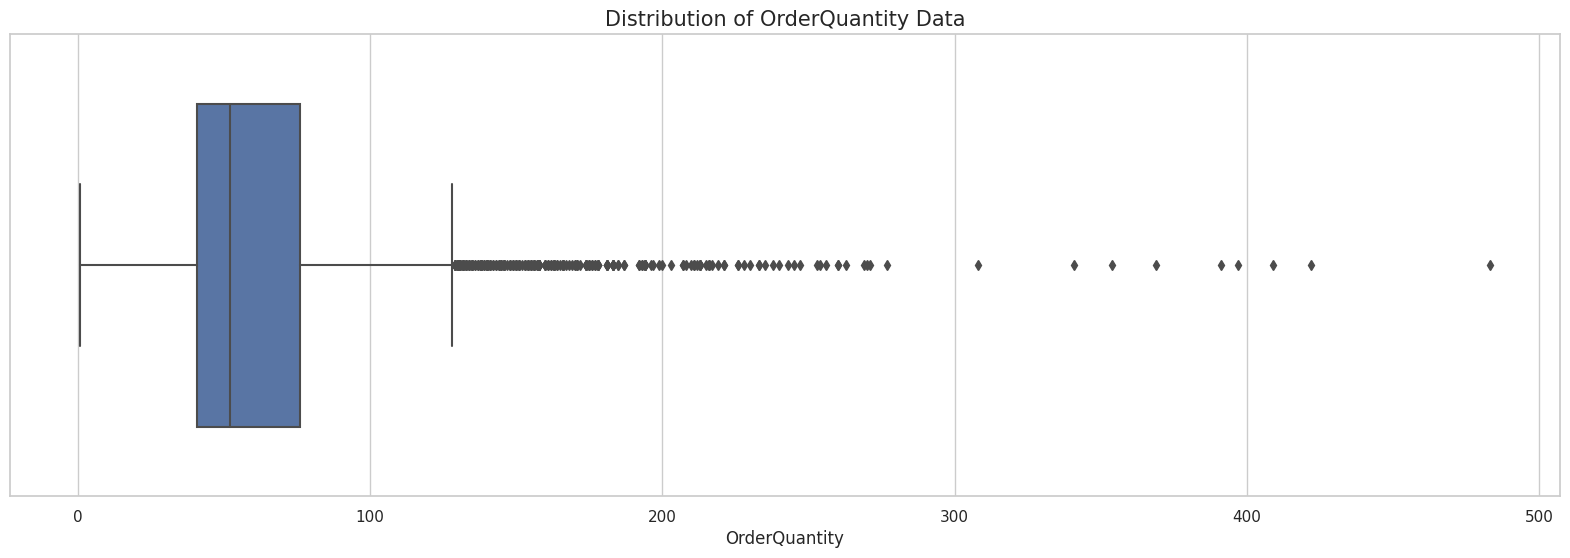

In [167]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(x='OrderQuantity', data=data_test, width=0.7)
ax.set_title('Distribution of OrderQuantity Data', fontsize=15)
plt.show()

In [168]:
data_test.duplicated().sum()

0

In [169]:
# Converting the dateofemail and date oforder to datetime format.
data_test['DateOfemail'] = pd.to_datetime(data_test['DateOfemail'])
data_test['DateOfOrder'] = pd.to_datetime(data_test['DateOfOrder'])
# Converting the date of registration to datetime format.
data_test['DateOfRegistration'] = pd.to_datetime(data_test['DateOfRegistration'])

In [170]:
# Convert date columns to datetime format
date_columns = ['DateOfOrder', 'DateOfemail', 'DateOfRegistration']
data_test[date_columns] = data_test[date_columns].apply(pd.to_datetime)

# Calculate time differences in days
data_test['customizedmail_Delay'] = (data_test['DateOfemail'] - data_test['DateOfOrder']).dt.days
data_test['welcomeemail_Delay'] = (data_test['DateOfRegistration'] - data_test['DateOfemail']).dt.days

# Check for negative time differences
negative_customizedmail = data_test[data_test['customizedmail_Delay'] < 0]
negative_welcomeemail = data_test[data_test['welcomeemail_Delay'] < 0]

In [171]:
# Dropping the attributes from the test data.
data_test.drop(['DateOfOrderyear','DateOfOrdermonth','DateOfOrderday','DateOfRegistrationyear','DateOfRegistrationmonth','DateOfRegistrationday','timestamp_x','timestamp_y','DateOfOrder','DateOfemail'],axis=1,inplace=True)

In [172]:
num=['OrderQuantity']
num

['OrderQuantity']

In [173]:
#Converting categorical attributes to numerical using dummifications.
categorical_att = pd.get_dummies(data_test[categorical_cols],drop_first = True)

In [174]:
dummies = categorical_att.reset_index()
dummies

,index,EmailType_WelcomeEmail,MailOpened_yes,MailClicked_no,MailClicked_yes,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,773630,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
1,277869,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0
2,28030,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0
3,17730,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
4,192476,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,679684,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5140,226080,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
5141,719722,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
5142,757597,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0


In [175]:
dummies = dummies.drop(['index'], axis=1)
dummies

,EmailType_WelcomeEmail,MailOpened_yes,MailClicked_no,MailClicked_yes,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5140,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
5141,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
5142,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0


In [176]:
#Standardizing the numerical test data.
scaler = StandardScaler()
scaler = scaler.fit(data_test[num])

In [177]:
scaler = pd.DataFrame(scaler.transform(data_test[num]), columns=data_test[num].columns)
scaler

,OrderQuantity
0,1.856361
1,0.311744
2,0.149153
3,-0.609607
4,1.016306
...,...
5139,0.636927
5140,0.691124
5141,-0.582508
5142,0.501434


In [178]:
scaler = scaler.reset_index()
scaler

,index,OrderQuantity
0,0,1.856361
1,1,0.311744
2,2,0.149153
3,3,-0.609607
4,4,1.016306
...,...,...
5139,5139,0.636927
5140,5140,0.691124
5141,5141,-0.582508
5142,5142,0.501434


In [179]:
scaler = scaler.drop(['index'], axis=1)
scaler

,OrderQuantity
0,1.856361
1,0.311744
2,0.149153
3,-0.609607
4,1.016306
...,...
5139,0.636927
5140,0.691124
5141,-0.582508
5142,0.501434


In [180]:
# Combining both the scaler and dummies of test data. 
test1_data = pd.concat([scaler,dummies], axis=1)
test1_data

,OrderQuantity,EmailType_WelcomeEmail,MailOpened_yes,MailClicked_no,MailClicked_yes,City_CITY2,City_CITY3,City_CITY4,OnlineCommunication_1,AutomaticRefill_1,DoorstepDelivery_1,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,1.856361,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0
1,0.311744,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0
2,0.149153,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0
3,-0.609607,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1.016306,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,0.636927,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5140,0.691124,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
5141,-0.582508,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
5142,0.501434,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0


In [181]:
test_pred_knn = knn_classifier.predict(test1_data)
test_pred_knn

array([1, 2, 1, ..., 0, 2, 0])

In [182]:
# Model Building using RandomForestClassifier without any hyperparamaters
test_pred_rf = clf1.predict(test1_data)
test_pred_rf

array([1, 1, 1, ..., 0, 0, 1])

In [183]:
data_test['RetentionPotential'] = test_pred_rf
data_test = data_test[['CustomerID', 'RetentionPotential']]
data_test = data_test.rename(columns={'CustomerID': 'Id', 'RetentionPotential': 'RetentionPotential'})

In [184]:
data_test.to_csv('final_output.csv', index=False)

In [185]:
data_test=pd.read_csv('final_output.csv')

In [186]:
data_test

,Id,RetentionPotential
0,C39476,1
1,C16188,1
2,C20577,1
3,C14740,1
4,C16448,1
...,...,...
5139,C30679,2
5140,C24466,1
5141,C26259,0
5142,C21869,0


In [187]:
 a=Counter(data_test['RetentionPotential'])
 a

Counter({1: 4238, 0: 675, 2: 231})

Counter({1: 4238, 0: 675, 2: 231})